In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.approximation import average_clustering
import community.community_louvain as cl

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 22
import seaborn as sns

from sklearn.metrics import adjusted_rand_score

# Funciones de utiles.py
# from utiles import read_graph , read_graph_weighted, get_graph_pos , drop_weights , plotGraph , plotWeightedGraph
from utiles import *

In [2]:
email = read_graph('datasets/email.txt')
terr= read_graph_weighted('datasets/terrorist.txt')
TerroristUnweighted = terr.copy()
drop_weights(TerroristUnweighted)

In [3]:
Gemail=email.copy()
Gemail.remove_edges_from(nx.selfloop_edges(Gemail)) # Borro autoenlaces
Gemailcc = sorted(nx.connected_components(Gemail), key=len, reverse=True)
emailGiant = Gemail.subgraph(Gemailcc[0])

In [4]:
pos_terr = nx.spring_layout(terr,iterations=1000)
pos_email = nx.spring_layout(email,iterations=1000)
pos_emailGiant = nx.spring_layout(emailGiant,iterations=1000)

# CENTRALIDAD Intermediacion vs CENTRALIDAD de Grado

In [5]:
email_centr_betweenness = nx.betweenness_centrality(emailGiant)
email_centr_grado = nx.degree_centrality(emailGiant)

terr_centr_betweenness = nx.betweenness_centrality(terr)
terr_centr_grado = nx.degree_centrality(terr) 

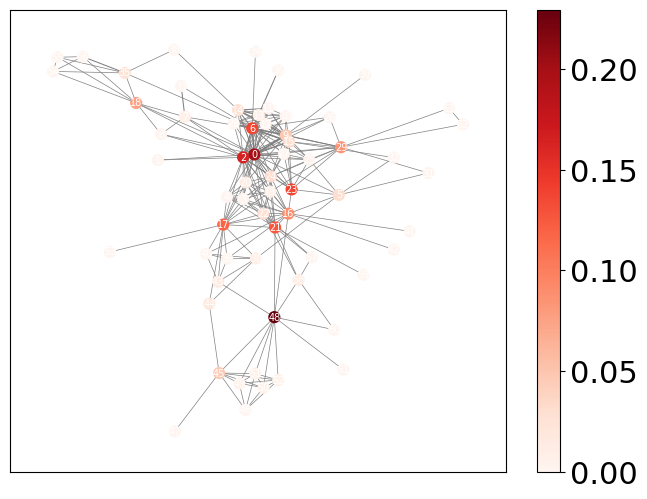

In [6]:
plotWeightedGraph(terr , pos_terr , terr_centr_betweenness, 1,60)

In [6]:
dict(sorted(terr_centr_betweenness.items() , key= lambda item : item[1],reverse=True))

{np.int64(48): 0.2296569891295954,
 np.int64(0): 0.20089716941995484,
 np.int64(2): 0.16427966506051503,
 np.int64(23): 0.13772902712994878,
 np.int64(6): 0.13705370000812914,
 np.int64(21): 0.12616081681621877,
 np.int64(17): 0.11891971720440744,
 np.int64(16): 0.09002491080064044,
 np.int64(29): 0.08407838108298937,
 np.int64(18): 0.0754137681173011,
 np.int64(9): 0.046934609146590714,
 np.int64(45): 0.04687338245965997,
 np.int64(24): 0.03246839779097843,
 np.int64(5): 0.03137224043522047,
 np.int64(15): 0.030028554798140056,
 np.int64(22): 0.027005120668715132,
 np.int64(14): 0.02638065979079804,
 np.int64(35): 0.02380505368216581,
 np.int64(44): 0.020199023322423227,
 np.int64(43): 0.014277586781427024,
 np.int64(20): 0.013148488878135575,
 np.int64(58): 0.012924486618803055,
 np.int64(30): 0.00881147071623262,
 np.int64(19): 0.007268427084095287,
 np.int64(13): 0.006739607891681621,
 np.int64(7): 0.006466523747629735,
 np.int64(49): 0.005076329244275992,
 np.int64(50): 0.00507632

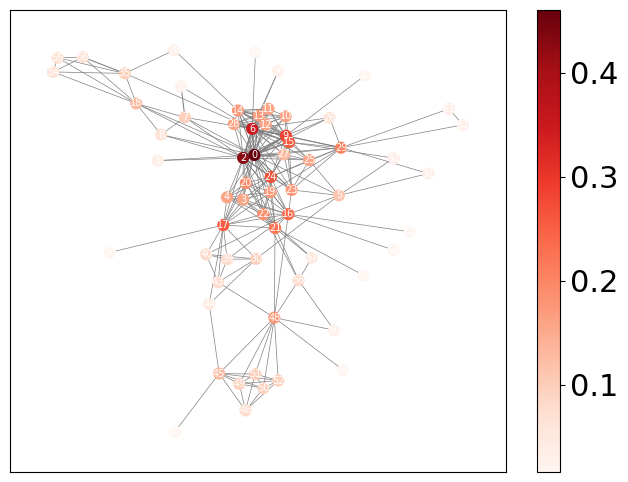

In [8]:
plotWeightedGraph(terr , pos_terr , terr_centr_grado, 1 , 60)


In [9]:
dict(sorted(terr_centr_grado.items() , key= lambda item : item[1],reverse=True))

{np.int64(0): 0.4603174603174603,
 np.int64(2): 0.42857142857142855,
 np.int64(6): 0.3492063492063492,
 np.int64(9): 0.2857142857142857,
 np.int64(24): 0.2698412698412698,
 np.int64(15): 0.25396825396825395,
 np.int64(17): 0.25396825396825395,
 np.int64(16): 0.23809523809523808,
 np.int64(21): 0.2222222222222222,
 np.int64(29): 0.20634920634920634,
 np.int64(20): 0.19047619047619047,
 np.int64(22): 0.19047619047619047,
 np.int64(13): 0.1746031746031746,
 np.int64(14): 0.1746031746031746,
 np.int64(19): 0.1746031746031746,
 np.int64(23): 0.1746031746031746,
 np.int64(48): 0.1746031746031746,
 np.int64(3): 0.15873015873015872,
 np.int64(4): 0.15873015873015872,
 np.int64(10): 0.15873015873015872,
 np.int64(11): 0.15873015873015872,
 np.int64(12): 0.15873015873015872,
 np.int64(25): 0.15873015873015872,
 np.int64(28): 0.15873015873015872,
 np.int64(18): 0.12698412698412698,
 np.int64(27): 0.12698412698412698,
 np.int64(45): 0.12698412698412698,
 np.int64(5): 0.1111111111111111,
 np.int64(

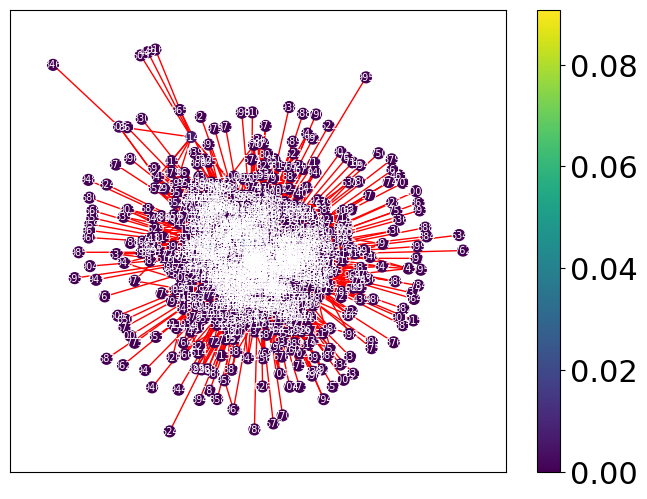

In [7]:
plotGraph(emailGiant , pos_emailGiant , email_centr_betweenness ,60)

Jugar con los tamaños con la centralidad.

In [11]:
dict(sorted(email_centr_betweenness.items() , key= lambda item : item[1],reverse=True))

{np.int64(160): 0.09082135184037173,
 np.int64(86): 0.03926117977217441,
 np.int64(5): 0.03220257241481287,
 np.int64(82): 0.028967274247816477,
 np.int64(121): 0.028926544195500805,
 np.int64(107): 0.025288872159340323,
 np.int64(13): 0.024483334651438062,
 np.int64(377): 0.024077739867942656,
 np.int64(62): 0.023387070516104624,
 np.int64(64): 0.022778106505897074,
 np.int64(211): 0.019997435619366257,
 np.int64(533): 0.019598039989646644,
 np.int64(84): 0.01929261573486897,
 np.int64(166): 0.01832679303089265,
 np.int64(971): 0.01734839019815566,
 np.int64(434): 0.016013354344399617,
 np.int64(411): 0.01490375455418449,
 np.int64(129): 0.014155912747933697,
 np.int64(65): 0.012959351781963736,
 np.int64(6): 0.012869357905991632,
 np.int64(183): 0.012788602032435103,
 np.int64(333): 0.012730730986403102,
 np.int64(301): 0.012556247771791389,
 np.int64(96): 0.012506308368290442,
 np.int64(21): 0.012048653737220064,
 np.int64(820): 0.011552490478744107,
 np.int64(44): 0.011421921455696

In [ ]:

values = [v for n,v in email_centr_grado.items()]
h=nx.draw_networkx_nodes(G,pos=pos,node_size=nodeSize, node_color = values,  ax=ax )
nx.draw_networkx_labels(G,pos,{n:n for n in G.nodes()},font_size=7,font_color='white', ax=ax)


edgeWidths=np.ones(G.number_of_edges())

nx.draw_networkx_edges(G, pos, edgelist=G.edges(),width=edgeWidths,edge_color='red')
plt.colorbar(h)


In [88]:
def plot_G(G,pos,centrality):
    plt.figure(figsize=(30,15))
    values = [v for n,v in centrality.items()]
    nodos_dict_sorted = dict(sorted(centrality.items() , key= lambda item : item[1],reverse=True))
    limite_centr = list(nodos_dict_sorted.values())[4]
    for node in G.nodes():
        size = centrality[node]
        if centrality[node]>=limite_centr:
            nx.draw_networkx_nodes(G,pos, node_size=size, node_color='red',alpha=1)
        else:
            nx.draw_networkx_nodes(G,pos, node_size=size, node_color='blue',alpha=0.001)
    nx.draw_networkx_labels(G,pos,{n:n for n in G.nodes() if centrality[n]>=limite_centr},font_size=10)
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(),edge_color='orange')

In [ ]:
def plot_G(G,pos,centrality,t):
    plt.figure()
    plt.axis('off')
    plt.title('Subgrafo de Game of Thrones, t={}'.format(t),fontsize = 24)

    for node in G.nodes():
        size = 100*centrality[node]**0.5
        if node in current_infectious:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#feba02')
        elif infection_times.get(node,9999999)<t:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#f2f6fa')
        else:
            ns = nx.draw_networkx_nodes(G,pos,nodelist=[node], node_size=size, node_color='#009fe3')
        ns.set_edgecolor('#f2f6fa')
    nx.draw_networkx_labels(G,pos,{n:n.replace('-','\n') for n in G.nodes() if weighted_degrees[n]>100},font_size=10);

    for e in G.edges(data=True):
        if e[2]['weight']>10:
            nx.draw_networkx_edges(G,pos,[e],width=e[2]['weight']/100,edge_color='#707070')

In [91]:
emailGiant.nodes()

NodeView((np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int

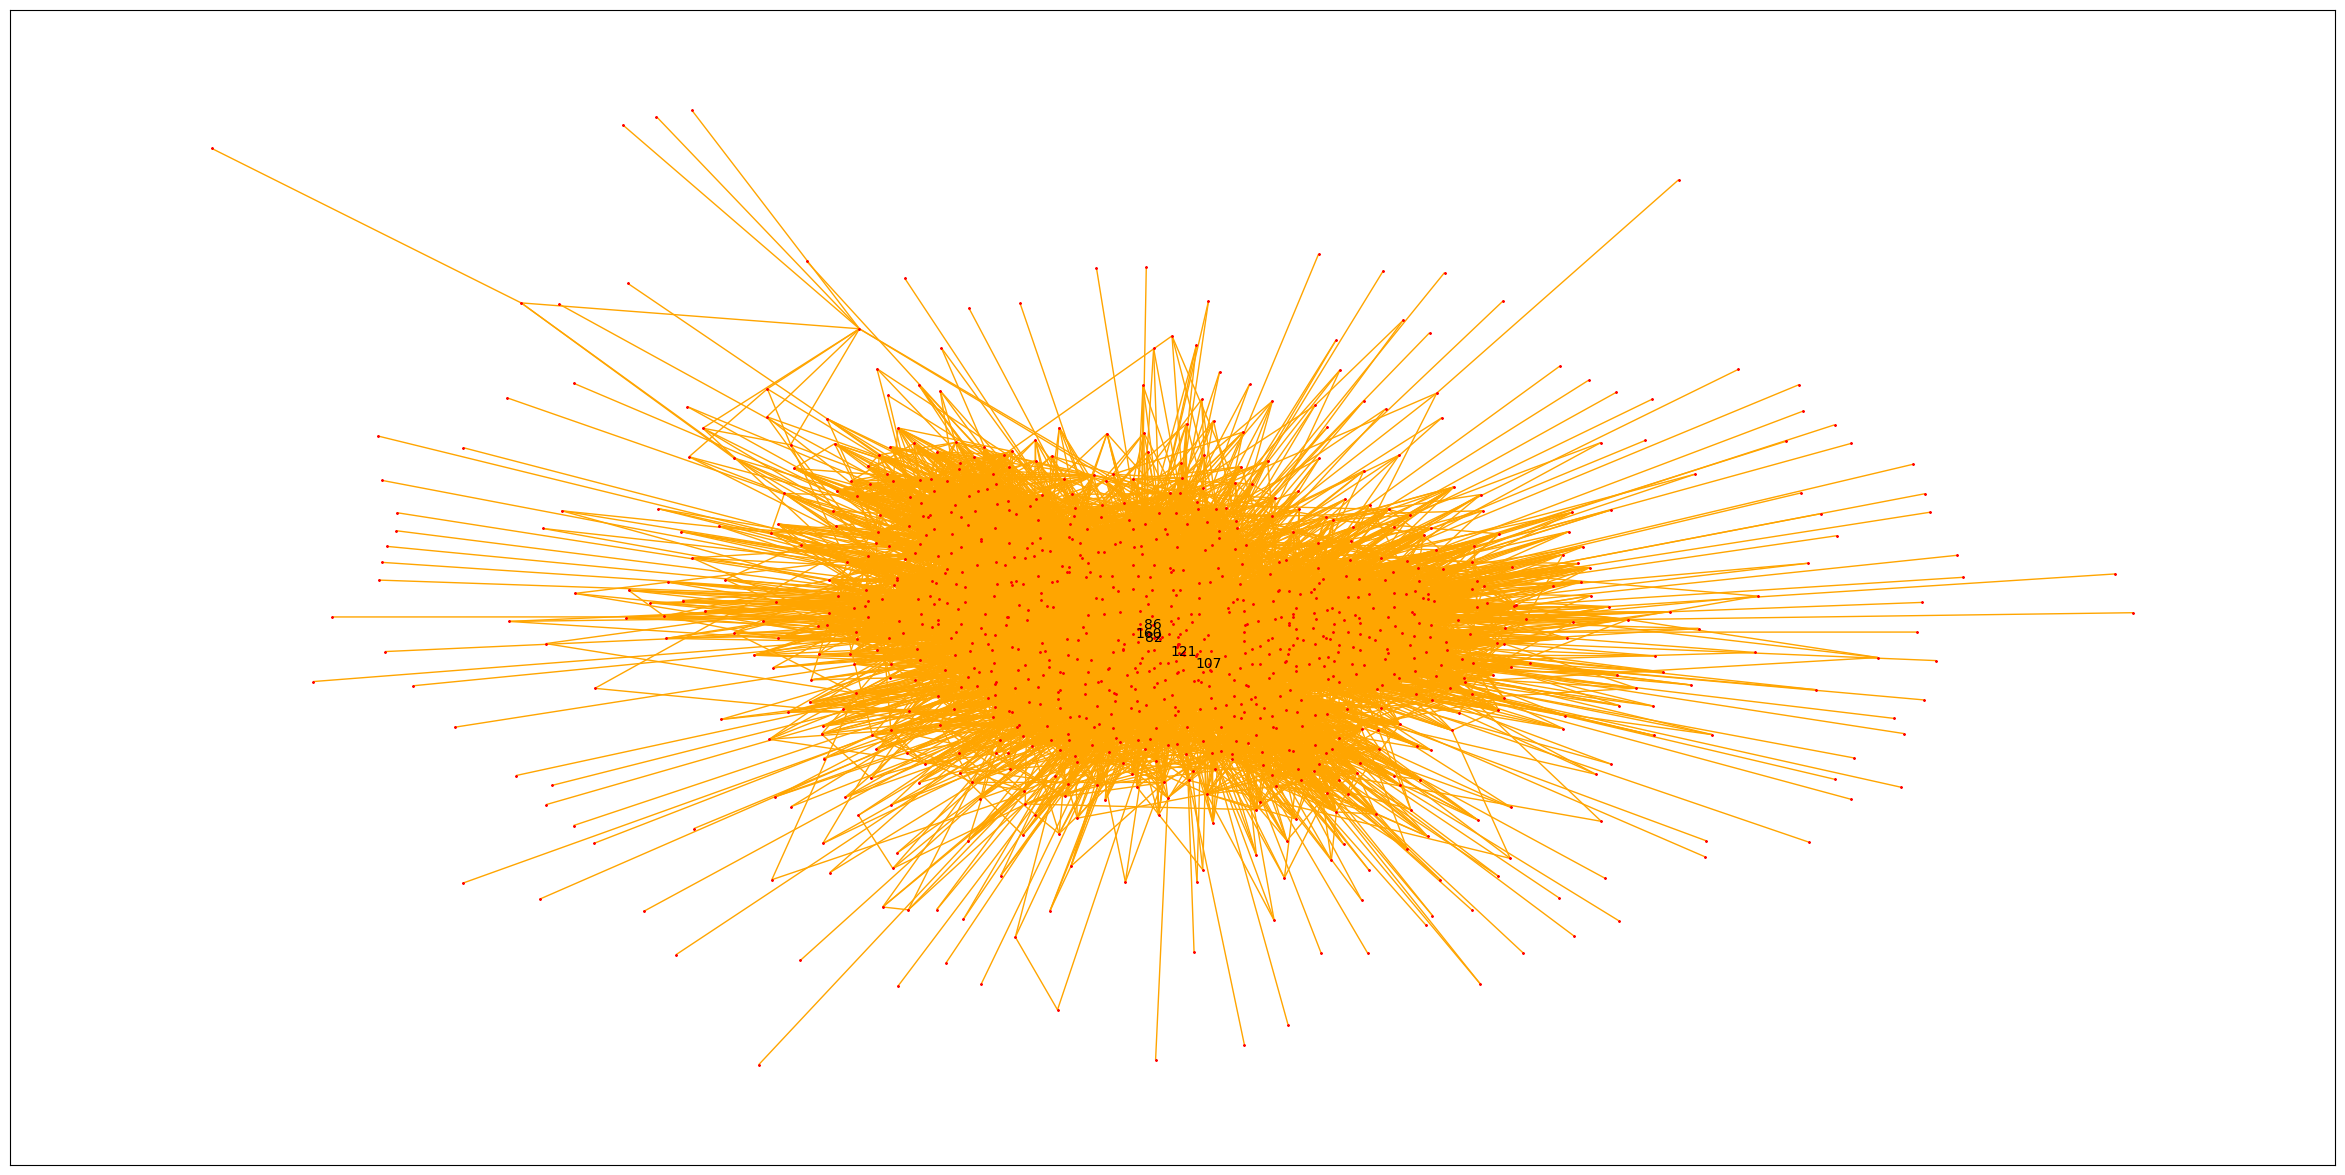

In [90]:
plot_G(emailGiant,pos_emailGiant,email_centr_grado)

In [59]:
def plot_G(G, pos, centrality):
    plt.figure(figsize=(10, 8))
    
    # Ordenar nodos por centralidad (de mayor a menor)
    nodos_dict_sorted = dict(sorted(centrality.items(), key=lambda item: item[1], reverse=True))
    
    # Obtener el valor de centralidad del 5º nodo más importante
    limite_centr = list(nodos_dict_sorted.values())[4]
    
    # Dibujar nodos
    for node in G.nodes():
        size = 100 * centrality[node]**0.5
        if centrality[node] >= limite_centr:
            # Nodos con alta centralidad: azules y destacados
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='blue', alpha=1.0)
        else:
            # Nodos menos centrales: grises y atenuados
            nx.draw_networkx_nodes(G, pos, nodelist=[node], node_size=size, node_color='gray', alpha=0.1)

    # Etiquetas solo para los nodos centrales
    etiquetas = {n: n for n in G.nodes() if centrality[n] >= limite_centr}
    nx.draw_networkx_labels(G, pos, etiquetas, font_size=10)

    # Dibujar aristas
    nx.draw_networkx_edges(G, pos, edge_color='orange')

    plt.axis('off')
    plt.title("Red con nodos destacados por centralidad")
    plt.show()


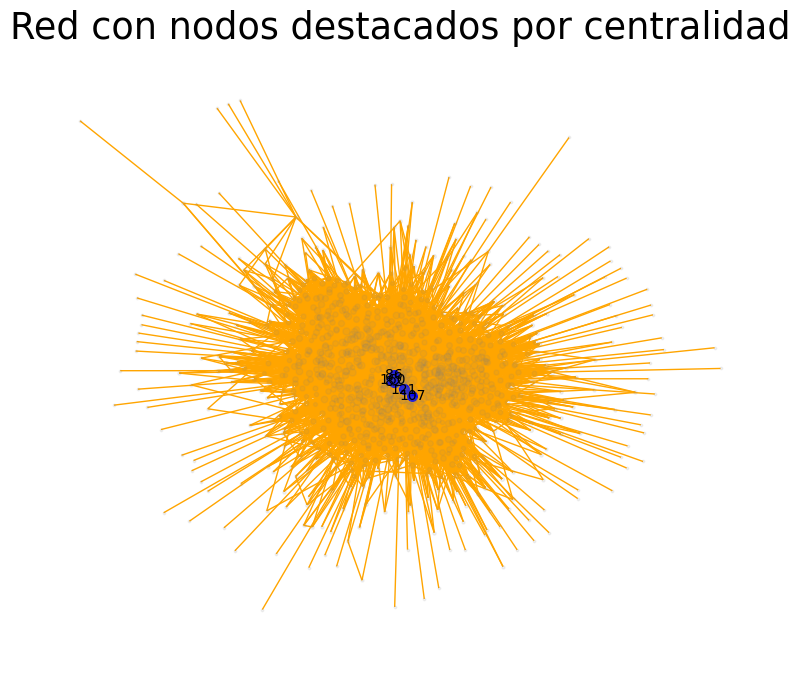

In [60]:
plot_G(emailGiant,pos_emailGiant,email_centr_grado)

In [ ]:
plotGraph(emailGiant , pos_emailGiant , email_centr_grado ,60)

In [26]:
dicc=dict(sorted(email_centr_grado.items() , key= lambda item : item[1],reverse=True))
lista=list(dicc.values())

In [31]:
lista[4]

0.21928934010152284

In [20]:
dict(sorted(email_centr_grado.items() , key= lambda item : item[1],reverse=True))

{np.int64(160): 0.350253807106599,
 np.int64(121): 0.23553299492385787,
 np.int64(82): 0.23451776649746195,
 np.int64(107): 0.22233502538071068,
 np.int64(86): 0.21928934010152284,
 np.int64(62): 0.21725888324873097,
 np.int64(434): 0.18578680203045686,
 np.int64(13): 0.18071065989847718,
 np.int64(166): 0.17766497461928935,
 np.int64(183): 0.1736040609137056,
 np.int64(5): 0.1715736040609137,
 np.int64(64): 0.17055837563451778,
 np.int64(249): 0.1685279187817259,
 np.int64(129): 0.16446700507614215,
 np.int64(533): 0.15939086294416244,
 np.int64(211): 0.15431472081218275,
 np.int64(105): 0.14619289340101524,
 np.int64(128): 0.14619289340101524,
 np.int64(106): 0.14213197969543148,
 np.int64(114): 0.14213197969543148,
 np.int64(283): 0.14213197969543148,
 np.int64(83): 0.14111675126903553,
 np.int64(142): 0.14111675126903553,
 np.int64(420): 0.1401015228426396,
 np.int64(87): 0.13908629441624365,
 np.int64(282): 0.13908629441624365,
 np.int64(377): 0.13908629441624365,
 np.int64(21): 0

In [11]:
email_centr_grado

{np.int64(0): 0.042639593908629446,
 np.int64(1): 0.050761421319796954,
 np.int64(2): 0.09441624365482235,
 np.int64(3): 0.0700507614213198,
 np.int64(4): 0.09543147208121829,
 np.int64(5): 0.1715736040609137,
 np.int64(6): 0.11472081218274112,
 np.int64(7): 0.07106598984771574,
 np.int64(8): 0.03553299492385787,
 np.int64(9): 0.03857868020304569,
 np.int64(10): 0.04771573604060914,
 np.int64(11): 0.0751269035532995,
 np.int64(12): 0.05685279187817259,
 np.int64(13): 0.18071065989847718,
 np.int64(14): 0.07918781725888326,
 np.int64(15): 0.050761421319796954,
 np.int64(16): 0.0751269035532995,
 np.int64(17): 0.11065989847715736,
 np.int64(18): 0.05482233502538071,
 np.int64(19): 0.07106598984771574,
 np.int64(20): 0.07309644670050762,
 np.int64(21): 0.13807106598984772,
 np.int64(22): 0.013197969543147208,
 np.int64(23): 0.0802030456852792,
 np.int64(24): 0.03857868020304569,
 np.int64(25): 0.03350253807106599,
 np.int64(26): 0.03350253807106599,
 np.int64(27): 0.06192893401015229,
 np

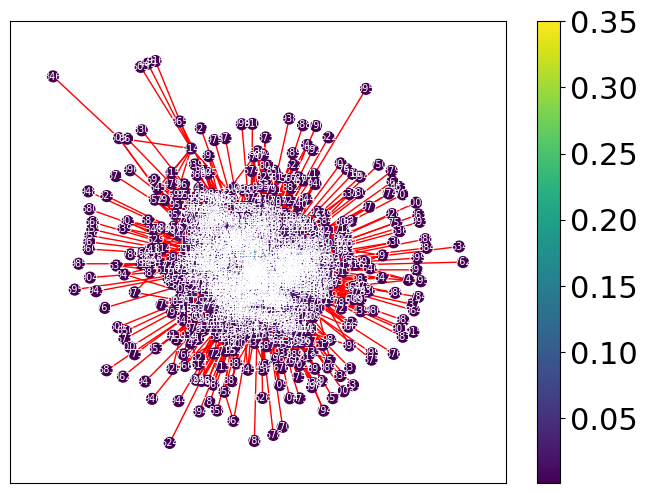

In [8]:
plotGraph(emailGiant , pos_emailGiant , email_centr_grado ,60)

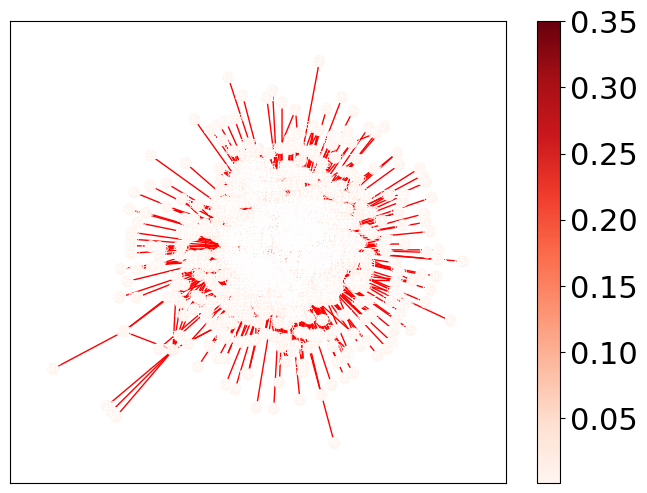

In [12]:
plotGraph(emailGiant , pos_emailGiant , email_centr_grado ,60)

In [13]:
dict(sorted(email_centr_grado.items() , key= lambda item : item[1],reverse=True))

{np.int64(160): 0.350253807106599,
 np.int64(121): 0.23553299492385787,
 np.int64(82): 0.23451776649746195,
 np.int64(107): 0.22233502538071068,
 np.int64(86): 0.21928934010152284,
 np.int64(62): 0.21725888324873097,
 np.int64(434): 0.18578680203045686,
 np.int64(13): 0.18071065989847718,
 np.int64(166): 0.17766497461928935,
 np.int64(183): 0.1736040609137056,
 np.int64(5): 0.1715736040609137,
 np.int64(64): 0.17055837563451778,
 np.int64(249): 0.1685279187817259,
 np.int64(129): 0.16446700507614215,
 np.int64(533): 0.15939086294416244,
 np.int64(211): 0.15431472081218275,
 np.int64(105): 0.14619289340101524,
 np.int64(128): 0.14619289340101524,
 np.int64(106): 0.14213197969543148,
 np.int64(114): 0.14213197969543148,
 np.int64(283): 0.14213197969543148,
 np.int64(83): 0.14111675126903553,
 np.int64(142): 0.14111675126903553,
 np.int64(420): 0.1401015228426396,
 np.int64(87): 0.13908629441624365,
 np.int64(282): 0.13908629441624365,
 np.int64(377): 0.13908629441624365,
 np.int64(21): 0

# Opcional: Preparación inciso d
Jess: Exportaremos las centralidades de ambos datasets para analizar la robustez del grafo.

In [18]:
# Crear carpeta si no existe
os.makedirs('datasets/centralidad', exist_ok=True)

# Terrorist Unweighted
df_betw_email = pd.DataFrame.from_dict(email_centr_betweenness, orient='index', columns=['intermediacion']).sort_values(by='intermediacion', ascending=False)
df_grado_email = pd.DataFrame.from_dict(email_centr_grado, orient='index', columns=['grado']).sort_values(by='grado', ascending=False)

df_betw_email.to_csv('datasets/centralidad/email_giant_intermediacion.csv', index_label='nodo')
df_grado_email.to_csv('datasets/centralidad/email_giant_grado.csv', index_label='nodo')

# Email Giant
df_betw_terr = pd.DataFrame.from_dict(terr_centr_betweenness, orient='index', columns=['intermediacion']).sort_values(by='intermediacion', ascending=False)
df_grado_terr = pd.DataFrame.from_dict(terr_centr_grado, orient='index', columns=['grado']).sort_values(by='grado', ascending=False)

df_betw_terr.to_csv('datasets/centralidad/terrorist_unweighted_intermediacion.csv', index_label='nodo')
df_grado_terr.to_csv('datasets/centralidad/terrorist_unweighted_grado.csv', index_label='nodo')

print("✅ ¡CSVs guardados exitosamente con la columna 'nodo'!")


✅ ¡CSVs guardados exitosamente con la columna 'nodo'!
